In [76]:

import sys
!{sys.executable} -m pip install -r requirements.txt



ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
You should consider upgrading via the '/Users/layalalzaydi/Desktop/Fillings/venv/bin/python -m pip install --upgrade pip' command.


In [77]:
from tqdm import tqdm
import pandas as pd
import pprint
import project_helper

import lxml

from pymongo import MongoClient


import pymongo  # package for working with MongoDB



from bs4 import BeautifulSoup
import re
import datetime

# import pyspark



import Stocklist



import re

from requests import get


from collections import Counter 


import re, requests

import numpy as np









In [3]:
cik_lookup = {
    'AMZN': '1018724',
'BMY': '0000014272',   
    'CNP': '0001130310',
    'CVX': '0000093410',
    'FL': '0000850209',
    'FRT': '0000034903',
    'HON': '0000773840'}

In [4]:
sec_api = project_helper.SecAPI()


In [5]:
%psource project_helper


In [78]:
def get_sec_data(cik, doc_type='',dateb='', owner='include', start=0, count=100,search_text=''):
    newest_pricing_data = pd.to_datetime('2020-07-01')

    
    
    rss_url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany' \
        '&CIK={}&type={}&dateb={}&owner={}&count={}&search_text={}&output=atom' \
        .format(cik, doc_type, dateb, owner , start ,count , search_text)
    
    print(rss_url)
    
    
    sec_data = sec_api.get(rss_url)
    feed = BeautifulSoup(sec_data.encode('ascii'), 'html').feed
    entries = [
        (
            
            entry.content.find('filing-date').getText())
        for entry in feed.find_all('entry', recursive=False)
        
        if pd.to_datetime(entry.content.find('filing-date').getText()) >= newest_pricing_data]
    print (entries)

    return entries
    


In [79]:
def get_sec_data_from_link(link):
    newest_pricing_data = pd.to_datetime('2020-07-01')


    
    sec_data = sec_api.get(link)
    feed = BeautifulSoup(sec_data.encode('ascii'), 'html').feed
    if feed is not None:
        entries = [
            (

                entry.content.find('filing-date').getText())
            for entry in feed.find_all('entry', recursive=False)

            if pd.to_datetime(entry.content.find('filing-date').getText()) >= newest_pricing_data]
        print (entries)

        return entries
    


In [80]:
def generate_link(cik, doc_type='',dateb='', owner='include', start=0, count=100,search_text=''):
    newest_pricing_data = pd.to_datetime('2020-07-01')

    rss_url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany' \
        '&CIK={}&type={}&dateb={}&owner={}&count={}&search_text={}&output=atom' \
        .format(cik, doc_type, dateb, owner , start ,count , search_text)
    return rss_url
    

In [16]:
cik_csv = pd.read_csv (r'/Users/layalalzaydi/Desktop/Fillings/app/appData/cik.csv')
cik_csv = cik_csv.drop(columns=['Unnamed: 0'])
cik_csv['Link']= ""
cik_csv = cik_csv.set_index('ticker')
# loop pver the cik get it inot the function and put the return into the link column 
for CIK in cik_csv.cik:
    link = generate_link(CIK)
    cik_csv.loc[cik_csv['cik'] == CIK, 'Link'] = link
    

In [17]:
cik_csv.to_csv('allinfo.csv')
    

In [18]:
def get_sec_CIK_From_Ticker(tickers):
    
    cik_dict = {}
    
    for ticker in tickers:
        URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany&output=atom'.format(ticker)

#         print(URL)


        sec_data = sec_api.get(URL)
        feed = BeautifulSoup(sec_data.encode('ascii'), 'html').feed
        
        print(type(feed))
        
        if feed is not None:
            result = feed.find('cik')

            print(len(result))
            print(result)

            if len(result):

                cik_dict[str(ticker).upper()] = result.get_text()

            print(result.get_text())
    

    return cik_dict

In [81]:
# example_ticker = 'AMZN'
sec_data = {}
for index in cik_csv.iterrows():
    print(index[1].Link)
    sec_data[index[0]] = get_sec_data_from_link(index[1].Link)

https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1090872&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-03', '2020-07-31', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1675149&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-29', '2020-07-20', '2020-07-15', '2020-07-13', '2020-07-08', '2020-07-08', '2020-07-07', '2020-07-07', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1555074&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=706688&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-12', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?

['2020-08-03', '2020-08-03', '2020-07-31', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-24', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1703056&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-06', '2020-08-06', '2020-08-05', '2020-08-05', '2020-08-04', '2020-08-03', '2020-07-23', '2020-07-23', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=2230&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-23', '2020-07-23', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=2178&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-12', '2020-08-12', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1002910&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-07-10', '20

['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-11', '2020-08-03', '2020-08-03', '2020-07-09', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=819793&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-30', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1604738&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-07-31', '2020-07-31', '2020-07-24', '2020-07-13', '2020-07-08', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1778114&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-16', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1750&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-22', '2020-07-21', '2020-07-21', '2020-07-21']
https://www.sec

['2020-08-13', '2020-08-13', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1129137&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-28', '2020-07-21', '2020-07-20', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=820027&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-10', '2020-08-10', '2020-08-05', '2020-07-30', '2020-07-10', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1411906&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-14', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1533924&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-13', '2020-08-10', '2020-08-07', '2020-08-05'

['2020-08-11', '2020-07-29', '2020-07-29', '2020-07-17', '2020-07-17', '2020-07-17', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1498068&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-07-09', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1305168&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-04', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1037676&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-28', '2020-07-28', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1508478&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-07-10', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1689662&type=&dateb=&owner=inclu

['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=731802&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-05', '2020-08-05', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=896622&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-07', '2020-07-31', '2020-07-30', '2020-07-28', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1606457&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-07-28', '2020-07-09', '2020-07-06', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1702780&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-03',

['2020-08-12', '2020-08-06', '2020-08-06', '2020-08-05', '2020-08-04', '2020-08-04', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=866787&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06', '2020-08-06', '2020-08-04', '2020-08-04', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1633438&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-05', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1432364&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-08', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=8947&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-07-15', '

['2020-08-11', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-29', '2020-07-29', '2020-07-20', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=312069&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-07', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-29', '2020-07-29', '2020-07-13', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1655050&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=9521&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1506289&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=913142&type=&dateb=&owner=include&count=0&search_text=100&outp

['2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-03', '2020-07-28', '2020-07-27', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=885590&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-27', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=863436&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1160864&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1108134&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-08-10', '2020-07-30', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=811809&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['20

['2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=14272&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-04', '2020-07-30', '2020-07-16', '2020-07-16', '2020-07-13', '2020-07-06', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1634117&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-23', '2020-07-21', '2020-07-21', '2020-07-20', '2020-07-15', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=9631&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-11', '2020-08-11', '2020-08-10', '2020-08-10', '2020-08-05', '2020-08-05', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1137390&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03']
https://www.sec.

['2020-08-10', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-31', '2020-07-31', '2020-07-08', '2020-07-06', '2020-07-02', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=946454&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-12', '2020-08-10', '2020-08-05', '2020-08-04', '2020-08-03', '2020-07-29', '2020-07-27', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=925683&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1528437&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1064728&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-05', '2020-08-03', '2020-07-17', '2020-07-17', '2020-07-16', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1379384&type=&da

['2020-08-05', '2020-08-04', '2020-08-03', '2020-07-30', '2020-07-28', '2020-07-27', '2020-07-27', '2020-07-21', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1536196&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-05', '2020-07-27', '2020-07-24', '2020-07-24', '2020-07-20', '2020-07-17', '2020-07-15', '2020-07-10', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1725123&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=312070&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1538849&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-07', '2020-07-27', '2020-07-2

['2020-08-14', '2020-08-11', '2020-08-10', '2020-08-03', '2020-07-29', '2020-07-29', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=929545&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-03', '2020-07-23', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=761648&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-10', '2020-08-07', '2020-07-28', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1306830&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-04', '2020-07-29', '2020-07-28', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1030475&type=&dateb=&owner=include&count=0&search_text=100&output=atom


['2020-08-10', '2020-08-10', '2020-08-10', '2020-08-06', '2020-07-31', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1739940&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-06', '2020-07-30', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=24090&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-07', '2020-08-07', '2020-08-05', '2020-08-05', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1071371&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-29', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=936395&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-06', '2020-08-05', '2020-07-29', '2020-07-24', '2020-07-21', '2020-07-21', '2020-07-17', '2020-07-17', '2020-07-17']
https://www.se

['2020-08-14', '2020-07-29', '2020-07-24', '2020-07-24', '2020-07-24', '2020-07-24', '2020-07-22', '2020-07-21', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=26172&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-07-28', '2020-07-28', '2020-07-09', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=766701&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-04', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1227654&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-04', '2020-07-10', '2020-07-07', '2020-07-07', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1503584&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', 

['2020-08-17', '2020-08-13', '2020-08-11', '2020-08-07', '2020-07-30', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1345105&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1221029&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-07-24', '2020-07-24', '2020-07-20', '2020-07-13', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=16732&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=928022&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-10', '2020-08-05', '2020-08-04', '2020-07-10', '2020-07-02']


['2020-08-10', '2020-08-07', '2020-08-05', '2020-08-03', '2020-07-30', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1547341&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-07', '2020-08-07', '2020-08-07', '2020-07-28', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1704715&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-07', '2020-07-31', '2020-07-31', '2020-07-30', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=26058&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1341141&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03', '2020-08-03', '2020-07-15', '2020-07-15', '2020-07-15']
https://www.s

['2020-08-06', '2020-08-06', '2020-08-05', '2020-07-31', '2020-07-31', '2020-07-24', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1369241&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=27904&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-07-15', '2020-07-14', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=26780&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-07', '2020-07-31', '2020-07-30', '2020-07-30', '2020-07-28', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1781753&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=916540&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-0

['2020-07-29', '2020-07-22', '2020-07-08', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1022079&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-24', '2020-07-23', '2020-07-13', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1159508&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-29', '2020-07-22', '2020-07-08', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1057861&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=882184&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-30', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=313616&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-30', '202

['2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=896493&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-14', '2020-08-04', '2020-08-03', '2020-07-29', '2020-07-28', '2020-07-24', '2020-07-22', '2020-07-17', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1286681&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-23', '2020-07-22', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1477641&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1023512&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=783280&type=&dateb=&owner=include&count=0&search_text=100&out

['2020-07-27', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1159508&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-29', '2020-07-22', '2020-07-08', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1002242&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=7323&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-07-29', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1210123&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-10', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=931148&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-06', '2020-08-06', '2020-08-05', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-24', '2020-07-24', '2020-07-02']
https:

['2020-08-14', '2020-08-10', '2020-08-10', '2020-08-07', '2020-08-03', '2020-07-29', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1665817&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1754836&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-07-14', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1379041&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-28', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1176984&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-03', '2020-07-30', '2020-07-28', '2020-07-27', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=827052&type=&dateb=&owner=include&count=0&sear

['2020-08-14', '2020-08-10', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1337619&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-10', '2020-08-07', '2020-08-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1529864&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-30', '2020-07-30', '2020-07-29', '2020-07-28', '2020-07-28', '2020-07-28', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1177162&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=316253&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1386067&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?acti

['2020-08-14', '2020-08-13', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=896156&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1395325&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1067837&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-08-07', '2020-07-20', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1551182&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-12', '2020-08-04', '2020-07-29', '2020-07-29', '2020-07-23', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=12819

['2020-07-23', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1302624&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-17', '2020-07-09', '2020-07-09', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=790500&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-21', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1033012&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-11', '2020-08-10', '2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1114446&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcom

['2020-08-05', '2020-07-31', '2020-07-31', '2020-07-29', '2020-07-17', '2020-07-17', '2020-07-17', '2020-07-15', '2020-07-14', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1575828&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=814547&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-07', '2020-08-07', '2020-08-05', '2020-07-29', '2020-07-29', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1114446&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1513789&type=&

['2020-08-12', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1735858&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-10', '2020-08-07', '2020-08-07', '2020-08-04', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1567569&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-17', '2020-07-09', '2020-07-09', '2020-07-08', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1574197&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1591670&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1589420&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2

['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1495825&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1060349&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-04', '2020-07-16', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=105744&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-07-31', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=923120&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-07-31', '2020-07-29', '2020-07-16', '2020-07-10', '2020-07-10', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=886982

['2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1061574&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1802749&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-07', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1061894&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-30', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=828803&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=40704&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-10', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CI

['2020-08-10', '2020-08-10', '2020-08-04', '2020-08-04', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=40987&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-30', '2020-07-30', '2020-07-14', '2020-07-08', '2020-07-08', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1031203&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-11', '2020-08-11', '2020-08-10', '2020-08-07', '2020-08-04', '2020-08-03', '2020-08-03', '2020-07-30', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=41091&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-30', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1408075&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-27', '2020-07-22', '2020-07-21']
https://www.sec.gov/cgi-bin/b

['2020-08-04', '2020-08-04', '2020-08-04', '2020-07-30', '2020-07-30', '2020-07-28', '2020-07-28', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1052752&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03', '2020-07-23', '2020-07-22', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1080720&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=42316&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=861459&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-10', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1613665&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-04', '2020-08-04', '20

['2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1501585&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-06', '2020-08-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1287808&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=910068&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-07', '2020-08-07', '2020-07-30', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=921082&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-07-31', '2020-07-28', '2020-07-16']
https://www.s

['2020-08-04', '2020-08-03', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1089113&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-11', '2020-08-11', '2020-08-10', '2020-08-07', '2020-08-03', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=45876&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1070750&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-11', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=47111&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-07-23', '2020-07-23', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-09', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?ac

['2020-08-13', '2020-08-10', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1537028&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1571949&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-14', '2020-08-13', '2020-08-12', '2020-08-11', '2020-08-10', '2020-08-10', '2020-08-07', '2020-08-06', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=941221&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-07-29', '2020-07-29', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1057877&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-07-30', '2020-07-30', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1417802&type=&dateb=&owner=includ

['2020-08-07', '2020-08-03', '2020-07-30', '2020-07-30', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1036262&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-12', '2020-08-11', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=829323&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-13', '2020-07-28', '2020-07-27', '2020-07-27', '2020-07-24', '2020-07-23', '2020-07-23', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1687229&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-11', '2020-08-04', '2020-08-04', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=866609&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=949961

['2020-08-06', '2020-07-20', '2020-07-17', '2020-07-17', '2020-07-13', '2020-07-08', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1433660&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-07-29', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1622353&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-08-03', '2020-08-03', '2020-07-17', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1385763&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-03', '2020-08-03', '2020-07-21', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=833444&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-08-04', '2020-07-31', '2020-07-31', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar

['2020-08-14', '2020-08-13', '2020-08-12', '2020-08-12', '2020-08-10', '2020-08-03', '2020-07-31', '2020-07-13', '2020-07-13', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=745308&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-29', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=859796&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1616291&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1216583&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1547994&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=19617&type=&dateb=&owner=include&count=0&search_text=100&output

['2020-08-14', '2020-07-30', '2020-07-29', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1506307&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-03', '2020-07-31', '2020-07-31', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=860748&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-11', '2020-08-07', '2020-08-07', '2020-08-07', '2020-08-03', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=55242&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1170010&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', 

['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=57725&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=763744&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-07', '2020-08-07', '2020-08-07', '2020-08-05', '2020-08-05', '2020-08-04', '2020-08-04', '2020-07-21', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=876343&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-06', '2020-08-06', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edg

['2020-07-23', '2020-07-23', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=3570&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-06', '2020-07-31', '2020-07-30', '2020-07-15', '2020-07-14', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=836157&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1779020&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1120970&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-12', '2020-07-28', '2020-07-22', '2020-07-17', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1711375&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-

['2020-08-12', '2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1115837&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-12', '2020-08-04', '2020-08-03', '2020-07-31', '2020-07-31', '2020-07-28', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1596967&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-31', '2020-07-29', '2020-07-24', '2020-07-24', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=888410&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1476034&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-05', '2020-08-05', '2020-08-05', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1490349&type=&dat

['2020-08-12', '2020-08-11', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-28', '2020-07-21', '2020-07-13', '2020-07-07', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045126&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=801961&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=891188&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=856128&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1436126&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=749098&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020

['2020-08-14', '2020-08-05', '2020-07-28', '2020-07-28', '2020-07-17', '2020-07-15', '2020-07-10', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=62709&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-04', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1518557&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-07-24', '2020-07-23', '2020-07-21', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1578732&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-07', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=66740&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-11', '2020-08-11', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-28', '2020-07-28', '

['2020-08-13', '2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1636519&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=68505&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-11', '2020-08-10', '2020-08-10', '2020-08-07', '2020-08-06', '2020-08-04', '2020-07-24', '2020-07-24', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1003078&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-07-10', '2020-07-08', '2020-07-08', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=32621&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1243429&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-

['2020-08-06', '2020-08-06', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=863900&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=65433&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-07', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1288469&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-13', '2020-08-13', '2020-08-13', '2020-08-13', '2020-08-13', '2020-08-13', '2020-08-11', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=882152&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=879361&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-10', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CI

['2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-07', '2020-08-07', '2020-08-06', '2020-07-31', '2020-07-20', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1737422&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1260563&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1173420&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-09', '2020-07-09', '2020-07-07', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=800166&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-30', '2020-07-14', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1004315&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['20

['2020-08-07', '2020-08-07', '2020-07-31', '2020-07-13', '2020-07-10', '2020-07-10', '2020-07-10', '2020-07-08', '2020-07-08', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=924613&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-31', '2020-07-20', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1651717&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1021860&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-28', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1772695&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-13', '2020-08-06', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcom

['2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=353278&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-06', '2020-08-06', '2020-07-28', '2020-07-20', '2020-07-13', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=906163&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-03', '2020-07-30', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1444380&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-08-05', '2020-08-05', '2020-07-10', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1114448&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-07-21', '2020-07-16', '2020-07-13', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1757073&type=&dateb=

['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1121484&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-30', '2020-07-29', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1039684&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-07', '2020-07-29', '2020-07-28', '2020-07-24', '2020-07-24', '2020-07-23', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=74303&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-12', '2020-08-07', '2020-08-05', '2020-07-24', '2020-07-16', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=712770&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-11', '2020-08-10', '2020-08-07', 

['2020-08-11', '2020-08-10', '2020-08-10', '2020-08-04', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1712807&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-31', '2020-07-30', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=75398&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-07', '2020-08-07', '2020-08-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1469395&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-10', '2020-08-03', '2020-07-29', '2020-07-24', '2020-07-22', '2020-07-07', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1327567&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-04', '2020-08-04', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-22', '2020-07-22']

['2020-08-10', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1114446&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1618673&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1478121&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-06', '2020-08-06', '2020-07-15', '2020-07-15', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK

['2020-08-10', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1540755&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-03', '2020-07-22', '2020-07-14', '2020-07-08', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1045609&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-11', '2020-07-31', '2020-07-28', '2020-07-27', '2020-07-21', '2020-07-14', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1095052&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=866028&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1637207&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '20

['2020-08-13', '2020-08-11', '2020-08-07', '2020-08-07', '2020-08-06', '2020-08-03', '2020-07-27', '2020-07-20', '2020-07-20', '2020-07-20']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1137774&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-06', '2020-08-04', '2020-07-17', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1393311&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-13', '2020-08-13', '2020-08-13', '2020-08-11', '2020-08-11', '2020-08-06', '2020-08-05', '2020-08-05', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=866368&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-05', '2020-08-04', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1498612&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-

['2020-08-03', '2020-08-03', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=84129&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-07-27', '2020-07-24', '2020-07-24', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=733269&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-13', '2020-08-13', '2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1046102&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-13', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=82811&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2

['2020-08-11', '2020-07-29', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=315213&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-03', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1040829&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1451505&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-05', '2020-07-30', '2020-07-29', '2020-07-15', '2020-07-10', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=863064&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03', '2020-07-29', '2020-07-17', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1501072&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03', '2020-07-16']
https://www.sec.gov/cgi-bin/brow

[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=315852&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-03', '2020-07-16', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=29669&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-29', '2020-07-28', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=861884&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03', '2020-07-30', '2020-07-28', '2020-07-28', '2020-07-28', '2020-07-24', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1060391&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-12', '2020-08-12', '2020-08-11', '2020-08-11', '2020-08-07', '2020-08-06', '2020-08-03', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1351285&type=&dateb=&owner=include&count=0&search_text=100&out

['2020-08-17', '2020-08-17', '2020-08-03', '2020-08-03', '2020-07-21', '2020-07-21', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1786909&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1580608&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-03', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-29', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1682220&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-07-09', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1001838&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-07-30', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-29

['2020-08-06', '2020-07-29', '2020-07-29', '2020-07-28', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=89800&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-03', '2020-07-31', '2020-07-28', '2020-07-28', '2020-07-21', '2020-07-08', '2020-07-08', '2020-07-08', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1312109&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-10', '2020-08-07', '2020-08-07', '2020-08-07', '2020-08-07', '2020-07-30', '2020-07-27', '2020-07-22', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1049659&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-21', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=90168&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06', '

['2020-08-11', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1564408&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1692063&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-07-30', '2020-07-30', '2020-07-28', '2020-07-10', '2020-07-10', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=313838&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-17', '2020-07-14', '2020-07-09', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1362705&type=&dateb=&owner=include&count=0&search_text=100&output=atom

['2020-07-28', '2020-07-28', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1126956&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1308606&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-04', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-31', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1032208&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-05', '2020-08-05', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1628063&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1043337&type=&date

['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1710583&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-08-05', '2020-07-14', '2020-07-08', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1739942&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-11', '2020-08-11', '2020-08-10', '2020-08-10', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=93556&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-10', '2020-08-05', '2020-08-05', '2020-07-31', '2020-07-30', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1000623&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-06', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02',

['2020-08-12', '2020-08-06', '2020-08-06', '2020-08-06', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=98222&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-31', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1094285&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-07-28', '2020-07-27', '2020-07-23', '2020-07-22', '2020-07-10', '2020-07-10', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1704299&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-30', '2020-07-20', '2020-07-20']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=886986&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-23', '2020-07-09', '2020-07-07', '2020-07-06', '2020-07-01']
https://www.se

['2020-08-10', '2020-08-07', '2020-08-07', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1001807&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1524025&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-16', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1094517&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1504167&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1744676&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-13', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1562476&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-0

['2020-07-29', '2020-07-29', '2020-07-28', '2020-07-28', '2020-07-28', '2020-07-28', '2020-07-22', '2020-07-20', '2020-07-20', '2020-07-20']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1552033&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-07-28', '2020-07-28', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=86312&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-06', '2020-07-23', '2020-07-23', '2020-07-14', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1747079&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-11', '2020-08-10', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1173643&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-04', '2020-07-28', '2020-07-23', '2020-07-23',

['2020-08-04', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=831001&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-14', '2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=8504&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-10', '2020-08-06', '2020-08-06', '2020-07-24', '2020-07-20']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1029800&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1543151&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-07', '2020-08-06', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-31', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcomp

['2020-08-07', '2020-08-06', '2020-08-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1090727&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-07', '2020-08-04', '2020-07-30', '2020-07-15', '2020-07-15', '2020-07-15', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1375205&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-05', '2020-08-04', '2020-07-31', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1067701&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-03', '2020-07-31', '2020-07-29', '2020-07-29', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=799195&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-08-06', '2020-07-01']
https://www.

['2020-08-07', '2020-07-24', '2020-07-15', '2020-07-15', '2020-07-08', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1692376&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-12', '2020-08-03', '2020-07-30', '2020-07-28', '2020-07-13', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1507385&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-14', '2020-07-14', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1293135&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-27', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=103379&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-07-31', '2020-07-29', '2020-07-28']
https://www.sec.gov/cgi-bi

['2020-08-05', '2020-08-05', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1616318&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1525221&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-07', '2020-07-14', '2020-07-13', '2020-07-10', '2020-07-10', '2020-07-09', '2020-07-09', '2020-07-08', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=740260&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-08-07', '2020-08-05', '2020-07-27', '2020-07-15', '2020-07-15', '2020-07-15', '2020-07-15', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=884219&type=&dateb=&owner=include&count=0&search_text=100&output=atom


['2020-08-12', '2020-07-24', '2020-07-22', '2020-07-15', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1267902&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-07', '2020-08-07', '2020-07-28', '2020-07-24', '2020-07-09', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1445305&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1262823&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1604665&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-13', '2020-08-13', '2020-08-13', '2020-08-06', '2020-08-06']
https://www

['2020-08-06', '2020-08-05', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1365135&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-05', '2020-08-04', '2020-07-06', '2020-07-06', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1525494&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-07', '2020-07-23', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1091907&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06', '2020-07-30', '2020-07-30', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=110471&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-11', '2020-08-06', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05'

['2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=836412&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-05', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1555280&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-04', '2020-08-04', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1423774&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-22', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1403752&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-09', '2020-07-08', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcom

['2020-08-14', '2020-08-13', '2020-08-13', '2020-08-07', '2020-08-07', '2020-07-22', '2020-07-10', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1427925&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-07-23', '2020-07-23', '2020-07-08', '2020-07-07', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1444192&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-10', '2020-07-31', '2020-07-07', '2020-07-07', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=934549&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-03', '2020-07-20', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1621227&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-08-06', '2020-08-04'

['2020-08-06', '2020-08-06', '2020-08-05', '2020-08-05', '2020-07-28', '2020-07-23', '2020-07-08', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1568162&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-05', '2020-08-05', '2020-07-28', '2020-07-23', '2020-07-08', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1608390&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-05', '2020-07-27', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1771007&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-21', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1769624&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1769624&type=&dateb=&owner=include&count=0&sea

['2020-08-10', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1322505&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-06', '2020-07-23', '2020-07-23', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=3545&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-07', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-06', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1341235&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-14', '2020-07-13', '2020-07-13', '2020-07-10', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1653087&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-07-17', '2020-07-16', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?a

['2020-08-14', '2020-08-10', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-30', '2020-07-29', '2020-07-29', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1788028&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1788028&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1788028&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1047127&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-30', '2020-07-30', '2020-07-28', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=741516&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['20

['2020-08-13', '2020-08-13', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1591956&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-10', '2020-07-31', '2020-07-17', '2020-07-17', '2020-07-17', '2020-07-16', '2020-07-07', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1387467&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-07-08', '2020-07-08', '2020-07-08', '2020-07-08', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=6769&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-04', '2020-08-03', '2020-08-03', '2020-07-30', '2020-07-30', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=744452&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-03', '2020-07-28', '

['2020-08-06', '2020-08-06', '2020-08-03', '2020-07-24', '2020-07-09', '2020-07-07', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1590715&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-24', '2020-07-23', '2020-07-21', '2020-07-20', '2020-07-17', '2020-07-17', '2020-07-08', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1697862&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=779544&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-07-08', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1086600&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1080709&type=&dateb=&owner=include&count=0&search_text=100&ou

['2020-08-10', '2020-08-04', '2020-07-20', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1464343&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-04', '2020-07-28', '2020-07-24', '2020-07-22', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1132651&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-04', '2020-07-24', '2020-07-17', '2020-07-10', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=879585&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-08-06', '2020-08-03', '2020-08-03', '2020-07-30', '2020-07-17', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1300699&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06'

['2020-08-13', '2020-08-11', '2020-08-10', '2020-07-22', '2020-07-10', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=727207&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-05', '2020-07-31', '2020-07-06', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=805928&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-08-05', '2020-07-22', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1636050&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-11', '2020-08-11', '2020-08-11', '2020-07-10', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1633070&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=160375

['2020-08-03', '2020-07-24', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1751692&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=9326&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=882796&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-10', '2020-08-06', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1668340&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-04', '2020-07-29', '2020-07-27', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1761612&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-08-05', '2020-07-20', '2020-07-13']
https://www.sec.gov/

['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-07', '2020-08-03', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1666134&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1589526&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1358403&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1791278&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-16', '2020-07-09', '2020-07-08', '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-02', '2020-07-02', '2020-07-01', '2020-07-01

['2020-08-10', '2020-08-06', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1597264&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-30', '2020-07-30', '2020-07-24', '2020-07-14', '2020-07-08', '2020-07-06', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=763901&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-23', '2020-07-10', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1133818&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-13', '2020-07-14', '2020-07-14', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1545772&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-10', '2020-08-06', '2020-07-14', '2020-07-06'

['2020-08-10', '2020-08-06', '2020-08-06', '2020-07-30', '2020-07-30', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1120370&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-05', '2020-08-05', '2020-07-10', '2020-07-09', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1505732&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-10', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-28', '2020-07-14', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1788257&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1780097&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-10', '2020-08-06', '2020-07-31

['2020-08-14', '2020-08-14', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1742089&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1378624&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-10', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1419536&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-07-28', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1369868&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1067294&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-03', '2020-07-30', '2020-07-23', '2020-07-14', 

['2020-08-17', '2020-08-13', '2020-08-13', '2020-08-10', '2020-08-10', '2020-08-07', '2020-08-06', '2020-08-05', '2020-08-04', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=949157&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-13', '2020-08-13', '2020-08-13', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1534120&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-06', '2020-07-31', '2020-07-06', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=804753&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-07-31', '2020-07-30', '2020-07-29', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1020214&type=&dateb=&owner=include&count=0&search_text=10

['2020-08-06', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1756497&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-05', '2020-07-16', '2020-07-16', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1756497&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-05', '2020-07-16', '2020-07-16', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=793628&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1785041&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1785041&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1785041&type=&dateb=&owner=include&count=0&search_te

['2020-08-11', '2020-08-11', '2020-08-10', '2020-08-10', '2020-08-04', '2020-07-21', '2020-07-13', '2020-07-10', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1279704&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-10', '2020-08-10', '2020-08-04', '2020-07-21', '2020-07-13', '2020-07-10', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=840715&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-07-29', '2020-07-22', '2020-07-09', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1539029&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-10', '2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=827876&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-07', '2020-08-04',

['2020-08-04', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=317540&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-04', '2020-08-04', '2020-07-07', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=887343&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-07-31', '2020-07-23', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1267565&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-05', '2020-08-05', '2020-07-14', '2020-07-09', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1050797&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-12', '2020-08-10', '2020-08-06', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05']

['2020-08-06', '2020-08-06', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-07-30', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1723648&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-10', '2020-08-06', '2020-08-06', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1723648&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-10', '2020-08-06', '2020-08-06', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1674416&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-05', '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-10', '2020-07-09', '2020-07-08', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1576427&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-30

['2020-08-06', '2020-08-06', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1720161&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-11', '2020-08-05', '2020-08-05', '2020-07-31', '2020-07-29', '2020-07-29', '2020-07-21', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1318484&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-13', '2020-07-07', '2020-07-02', '2020-07-02', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1058290&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-05', '2020-07-30', '2020-07-29', '2020-07-29', '2020-07-13', '2020-07-13', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1175151&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04

['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1590895&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-10', '2020-08-06', '2020-08-06', '2020-08-06', '2020-07-31', '2020-07-27', '2020-07-22', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1367859&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-07-31', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1793862&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=351998&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-06', '2020-07-13', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=915779&type=&date

['2020-08-06', '2020-08-06', '2020-07-23', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1498382&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-07-28', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1438231&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-06', '2020-07-30', '2020-07-29', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1651944&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1357204&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-13', '2020-08-12', '2020-08-12', '2020-08-06

['2020-08-13', '2020-08-11', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1601936&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1534708&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-05', '2020-07-23', '2020-07-22', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1065088&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-07', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-03', '2020-08-03', '2020-07-29', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1065088&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11

['2020-08-11', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=808326&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-08-06', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=31107&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-03', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1593034&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=933738&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1596812&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10']
https:

['2020-08-14', '2020-08-13', '2020-08-10', '2020-08-07', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-31', '2020-07-30', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1015780&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-05', '2020-07-28', '2020-07-23', '2020-07-22', '2020-07-21', '2020-07-17', '2020-07-17', '2020-07-16', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1785173&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-07-20', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-14', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1710340&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-11', '2020-07-31', '2020-07-31', '2020-07-30', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1370637&type=

['2020-08-05', '2020-08-04', '2020-08-04', '2020-07-27', '2020-07-22', '2020-07-08', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1701261&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1539838&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1413855&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=34563&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-29', '2020-07-22', '2020-07-20', '2020-07-20', '2020-07-20', '2020-07-20', '2020-07-20', '2020-07-20', '2020-07-20', '2020-07-20']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=917491&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-07-27', '20

['2020-07-17', '2020-07-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=923139&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-10', '2020-08-03', '2020-08-03', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=36029&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-07-28', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1048695&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-05', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1401564&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-28', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1413837&type=&dateb=&owner=include&

['2020-08-11', '2020-08-11', '2020-08-11', '2020-08-10', '2020-07-27', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=709337&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-06', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-03', '2020-08-03', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1538927&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1035976&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-08-04', '2020-08-03', '2020-07-31', '2020-07-30', '2020-07-20', '2020-07-14', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1069996&type=&dateb=&owner=include&count=0&search_text=100&output=atom

['2020-08-03', '2020-07-27', '2020-07-17', '2020-07-16', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1678463&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-07-28', '2020-07-28', '2020-07-17', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1530249&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-05', '2020-07-23', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1145057&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-07-31', '2020-07-24', '2020-07-22', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1816736&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-12', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11

['2020-08-11', '2020-08-06', '2020-07-31', '2020-07-31', '2020-07-28', '2020-07-28', '2020-07-21', '2020-07-14', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1133416&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1799332&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1328919&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=868671&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-30', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1476765&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-10', '2020-08-10', '2020-08-10', '2020-07-15', '2020-07-09', '2020-07-09']
h

['2020-07-29', '2020-07-29', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1499780&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-12', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-03', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=890066&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1372020&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-05', '2020-08-04', '2020-08-04', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1053092&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-13'

['2020-07-27', '2020-07-27', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1652044&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1652044&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1728117&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=874499&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-10', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-06'

['2020-08-14', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=944480&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-07-24', '2020-07-24', '2020-07-23', '2020-07-22', '2020-07-10', '2020-07-07', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1522690&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-14', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1351288&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-08-06', '2020-08-06', '2020-07-22', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1434728&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06', '2020-08-06', '2020-08-03', '2020-08-03', '2020-08-03', '2020-08-03'

['2020-07-24', '2020-07-24', '2020-07-22', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1573097&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-11']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=925528&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-05', '2020-08-05', '2020-08-03', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1493761&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-07', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1603993&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-07-31', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1803901&type=&dateb=&owner=includ

['2020-08-10', '2020-07-31', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1711786&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-08-05', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1140102&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1428336&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-15', '2020-07-13', '2020-07-09', '2020-07-09', '2020-07-08', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1360214&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10

['2020-07-31', '2020-07-13', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1718405&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-10', '2020-07-22', '2020-07-22', '2020-07-17', '2020-07-16', '2020-07-13', '2020-07-13', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1718405&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-10', '2020-07-22', '2020-07-22', '2020-07-17', '2020-07-16', '2020-07-13', '2020-07-13', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1713832&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1492426&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-07', '2020-08-07', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05

['2020-08-13', '2020-08-13', '2020-08-12', '2020-08-11', '2020-08-07', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1708688&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-07-30', '2020-07-30', '2020-07-21', '2020-07-20', '2020-07-20', '2020-07-17', '2020-07-16', '2020-07-16', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1794338&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-07-29', '2020-07-20']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1794338&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-07-29', '2020-07-20']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1496323&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-06', '2020-08-06', '2020-08-03', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06

['2020-08-13', '2020-08-13', '2020-08-06', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1113148&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-30', '2020-07-30', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1138639&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-12', '2020-08-11', '2020-08-06', '2020-08-06', '2020-08-05', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1294133&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1711754&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-07', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-30', '2020-07-28', '2020-07-21', '2020-07-20', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1742692&type=&date

['2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1388658&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-13', '2020-08-13', '2020-08-12', '2020-08-11', '2020-08-11', '2020-08-07', '2020-08-07', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1446847&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1594012&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1410939&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-06', '2020-08-06', '2020-08-05', '2020-07-17', '2020-07-17', '2020-07-17', '2020-07-06', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=875355&type=&dateb=&owner=includ

['2020-08-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1737339&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=785956&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-11', '2020-08-10', '2020-07-31', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=779152&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1302350&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-11', '2020-08-04', '2020-07-30', '2020-07-29', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1302350&type=&dateb=&owner=include&count=0&sea

['2020-08-14', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-23', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=56978&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-12', '2020-08-11', '2020-07-30', '2020-07-30', '2020-07-06', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1738827&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-03', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1567529&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-11', '2020-08-10', '2020-08-05', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1316517&type=&dateb=&owner=in

['2020-08-06', '2020-08-05', '2020-07-21', '2020-07-20', '2020-07-16', '2020-07-16', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1766146&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1766146&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1766146&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=912766&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-29', '2020-07-23', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=703604&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-05', '2020-07-30', '2020-07-30']
https://www.sec.gov/cgi-bin/brow

['2020-08-14', '2020-08-10', '2020-08-05', '2020-08-05', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-31', '2020-07-30', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1286613&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-11']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1512499&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1307579&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-09', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1633978&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-11', '2020-08-06', '2020-07-15', '2020-07-02']
https://www

['2020-08-05', '2020-07-28', '2020-07-28', '2020-07-23', '2020-07-21', '2020-07-16', '2020-07-14', '2020-07-09', '2020-07-02', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1420302&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1661920&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-14', '2020-08-03', '2020-07-06', '2020-07-02', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1504678&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-15', '2020-07-15', '2020-07-14', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1434588&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-11

['2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=763532&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-07-10', '2020-07-10', '2020-07-10', '2020-07-10', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1274792&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-07', '2020-08-07', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-27', '2020-07-24', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=896494&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-07-29', '2020-07-20', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1056696&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-27', '2020-07-23']

['2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1103982&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-13', '2020-08-11', '2020-08-06', '2020-08-03', '2020-08-03', '2020-08-03', '2020-07-29', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1654595&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-05', '2020-07-13', '2020-07-09', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1124804&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-03', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1593984&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1668397&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2

['2020-08-12', '2020-08-10', '2020-08-06', '2020-08-06', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1408443&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-03', '2020-07-30', '2020-07-29', '2020-07-29', '2020-07-24', '2020-07-23', '2020-07-06', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=807863&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-07-30', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1696396&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-07', '2020-08-07', '2020-08-06', '2020-07-10', '2020-07-10', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1626853&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-13', '2020-08-13', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10'

['2020-08-10', '2020-08-10', '2020-07-09', '2020-07-09', '2020-07-08', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-02', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1289419&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-14', '2020-08-13', '2020-08-11', '2020-08-07', '2020-08-05', '2020-08-05', '2020-07-31', '2020-07-30', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=890394&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-07', '2020-08-07', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1686850&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-11', '2020-08-11', '2020-07-13', '2020-07-13', '2020-07-13', '2020-07-13', '2020-07-13', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1516805&type=&

['2020-08-14', '2020-08-13', '2020-08-13', '2020-08-11', '2020-08-05', '2020-08-04', '2020-07-27', '2020-07-27', '2020-07-23', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=866273&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=68709&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03', '2020-08-03', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1493594&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06', '2020-08-03', '2020-07-30', '2020-07-29', '2020-07-23', '2020-07-15', '2020-07-14', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1025561&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=723125&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['202

['2020-08-05', '2020-07-31', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1377630&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-03', '2020-08-03', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1709626&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1566895&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03', '2020-07-24', '2020-07-17', '2020-07-16', '2020-07-16', '2020-07-16', '2020-07-16', '2020-07-14', '2020-07-14', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1692427&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-10', '2020-08-10', '2020-07-13', '2020-07-10']
https://www.sec.gov/cgi

['2020-08-10', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-05', '2020-08-03', '2020-07-31', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1023844&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-07-27', '2020-07-21', '2020-07-21', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=912061&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1003935&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-03', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1000045&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-07', '2020-08-04', '2020-07-31', '2020-07-30', '2020-07-30', '2020-07-14', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar

['2020-08-10', '2020-08-10', '2020-08-05', '2020-08-05', '2020-07-17', '2020-07-17', '2020-07-17', '2020-07-17', '2020-07-17', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1110646&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-03', '2020-07-28', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1122904&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-14', '2020-08-13', '2020-08-10', '2020-08-06', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-03', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=875582&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-24', '2020-07-09', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1652130&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-06', '2020-08-06', '2020-07-17', '2020-07-02'

['2020-08-06', '2020-08-05', '2020-07-24']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1661059&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-31', '2020-07-17', '2020-07-16', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1566826&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-14', '2020-08-07', '2020-08-07', '2020-07-29', '2020-07-14', '2020-07-13', '2020-07-13', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1273685&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-05', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1273685&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-05', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06

['2020-08-06', '2020-07-31', '2020-07-23', '2020-07-08', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=926326&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-10', '2020-07-31', '2020-07-30', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1285819&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-13', '2020-08-12', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=798528&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1652133&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1097864&type=&dateb=&owner=include

['2020-08-11', '2020-08-04', '2020-07-15', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=826154&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-10', '2020-08-06', '2020-07-28', '2020-07-21', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1770251&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-03', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1770251&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-03', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1770251&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-03', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1770251&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-03', '2020-07-06']
https://www.sec.g

['2020-08-14', '2020-08-13', '2020-08-12', '2020-08-06', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1069899&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-27', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1807901&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-03', '2020-07-31', '2020-07-30', '2020-07-28', '2020-07-24', '2020-07-23', '2020-07-23', '2020-07-22', '2020-07-22', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1606909&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-12', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1787297&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1616741&type=&dateb=&owner=include&count=0&search_text=100&o

['2020-08-06', '2020-07-20']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=318300&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-30', '2020-07-28', '2020-07-27', '2020-07-24', '2020-07-22', '2020-07-21', '2020-07-13', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1634447&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1013857&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-03', '2020-08-03', '2020-07-28', '2020-07-28', '2020-07-16', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=778164&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-13', '2020-08-11', '2020-08-10', '2020-08-07', '2020-07-28', '2020-07-28',

['2020-07-28', '2020-07-15', '2020-07-10', '2020-07-10', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1315399&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-07', '2020-08-04', '2020-07-27', '2020-07-24', '2020-07-20', '2020-07-15', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=76282&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-04', '2020-07-07', '2020-07-07', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=810136&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-07-16', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1525769&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-10', '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-07', '2020-07-01']
https://www.sec.gov/cgi-bin/

['2020-08-07', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=887226&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1046568&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-16', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1085869&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-07-30', '2020-07-30', '2020-07-29', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=876167&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-08', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1007330&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['202

['2020-08-11', '2020-08-11', '2020-08-10', '2020-08-07', '2020-08-05', '2020-08-05', '2020-07-20', '2020-07-17', '2020-07-15', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1076682&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-10', '2020-08-10', '2020-08-06', '2020-08-06', '2020-08-05', '2020-08-04', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=889900&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-07-28', '2020-07-23', '2020-07-23', '2020-07-13', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1377121&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1445283&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-01'

['2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-07', '2020-08-07', '2020-08-07', '2020-08-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1596946&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-03', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1503274&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-11', '2020-08-11', '2020-08-07', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1733298&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=882508&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-1

['2020-08-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1140215&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-10', '2020-08-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=793524&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-06', '2020-08-04', '2020-07-30', '2020-07-21', '2020-07-17', '2020-07-15', '2020-07-02', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=910606&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-08-06', '2020-08-04', '2020-08-04', '2020-07-31', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1463258&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=872589&type=&dateb=&owner=include&count=0&search_text=100&outp

['2020-08-10', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1590799&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1469443&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-13', '2020-07-22', '2020-07-10', '2020-07-10', '2020-07-08', '2020-07-06', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1812364&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1553643&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-04', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1767

['2020-08-10', '2020-08-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1753268&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1469367&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-13', '2020-08-10', '2020-08-10', '2020-08-07', '2020-08-04', '2020-07-30', '2020-07-24', '2020-07-14', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1012019&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-10', '2020-08-07', '2020-08-03', '2020-07-28', '2020-07-28', '2020-07-28', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1012019&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-10', '2020-08-07', '2020-08-03', '2020-07-28', '2020-07-28', '2020-07-28', '2020-07-22']
https://www.sec.gov/cgi-b

['2020-08-11', '2020-08-05', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=705432&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31', '2020-07-22']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1680379&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-03', '2020-07-27']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=829224&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-07-28', '2020-07-28', '2020-07-20', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=866729&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-10', '2020-07-27', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=912603&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=

['2020-08-13', '2020-07-22', '2020-07-22', '2020-07-07', '2020-07-07', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=788611&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-23', '2020-07-23', '2020-07-20', '2020-07-17', '2020-07-15', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=788611&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-07-23', '2020-07-23', '2020-07-20', '2020-07-17', '2020-07-15', '2020-07-14']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=915358&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1001233&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-05', '2020-08-05', '2020-08-05', 

['2020-08-14', '2020-08-03', '2020-07-27', '2020-07-27', '2020-07-24', '2020-07-24', '2020-07-20', '2020-07-17', '2020-07-09', '2020-07-09']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=793733&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-07', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1038074&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-29', '2020-07-29', '2020-07-22', '2020-07-21', '2020-07-20', '2020-07-15', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1263762&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1707502&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06', '2020-08-06', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-27']
https://www.sec.gov/cgi-bi

['2020-08-14', '2020-08-14', '2020-08-13', '2020-08-07', '2020-08-07', '2020-07-31', '2020-07-24', '2020-07-20', '2020-07-17']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1367083&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06', '2020-07-29', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=883241&type=&dateb=&owner=include&count=0&search_text=100&output=atom
[]
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1061027&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-07', '2020-08-03', '2020-07-31', '2020-07-30', '2020-07-29', '2020-07-28', '2020-07-28', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1121404&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-07', '2020-08-05', '2020-08-04', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-23', '2020-07-07']
https://www.sec.gov/cgi-

['2020-08-10', '2020-08-07', '2020-08-06', '2020-08-06', '2020-08-04', '2020-08-04', '2020-07-08', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=924717&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-08-05', '2020-07-24', '2020-07-23', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-21', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1310114&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-08-04', '2020-07-29', '2020-07-29', '2020-07-29', '2020-07-28', '2020-07-24', '2020-07-15', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1760173&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-11', '2020-08-07', '2020-08-04', '2020-08-03', '2020-07-30', '2020-07-24', '2020-07-24', '2020-07-24', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=

['2020-08-07', '2020-08-07', '2020-08-05', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1008586&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1382101&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-06', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=885508&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-08-10', '2020-07-16']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=933034&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1692830&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11', '2020-08-11', '2020-08-10', '202

['2020-08-14', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1588084&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-04', '2020-07-24', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1378453&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1378453&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1378453&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1552670&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany

['2020-08-13', '2020-08-13', '2020-08-12', '2020-07-15', '2020-07-09', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=61398&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-03', '2020-08-03', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1660280&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-08-05', '2020-08-04', '2020-08-04', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=34956&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-07', '2020-07-22', '2020-07-21', '2020-07-20', '2020-07-16', '2020-07-16', '2020-07-08', '2020-07-08']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=97210&type=&dateb=&owner=include&count=0&sear

['2020-08-14', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-07-31', '2020-07-13', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1438133&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-08-10', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1430306&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-17', '2020-08-17', '2020-08-17', '2020-08-10', '2020-08-10', '2020-08-06', '2020-08-04', '2020-08-03', '2020-07-21']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1296484&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-13', '2020-08-10', '2020-08-07', '2020-07-10', '2020-07-08', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1720580&type=

['2020-08-13', '2020-08-13', '2020-08-11', '2020-08-06', '2020-08-05', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=831641&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-07', '2020-08-05', '2020-08-05', '2020-08-05', '2020-07-31', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1293282&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-07', '2020-08-05', '2020-08-05', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1116942&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-07-29', '2020-07-02', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=910267&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14',

['2020-08-17', '2020-08-12', '2020-07-15']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1275014&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-08-05', '2020-08-05', '2020-08-03', '2020-08-03', '2020-07-30', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=101984&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-14', '2020-08-14', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-11', '2020-08-07', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1041514&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-08-05']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=101199&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-08-05', '2020-07-29', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=912767

['2020-08-06', '2020-08-04', '2020-08-04', '2020-07-29', '2020-07-28']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1290476&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-14', '2020-08-10', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=764195&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-03', '2020-07-31', '2020-07-31', '2020-07-31', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1603207&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-12', '2020-08-05', '2020-08-03', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1501570&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-07', '2020-08-05'

['2020-08-07', '2020-08-04', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1810491&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-10', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1729149&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-04']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1347178&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-06', '2020-08-05', '2020-07-29', '2020-07-29', '2020-07-29']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1508475&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-05', '2020-08-05', '2020-07-23', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1602065&type=&dateb=&owner=include&count=0&sea

['2020-08-10', '2020-08-06', '2020-08-03', '2020-07-29', '2020-07-23']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1716770&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-31']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=737468&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-07-29', '2020-07-28', '2020-07-20', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1575793&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-06', '2020-07-29', '2020-07-13']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1595761&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-10', '2020-07-08', '2020-07-06', '2020-07-01', '2020-07-01', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1618921&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '20

['2020-08-14', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1569994&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2020-07-27', '2020-07-21', '2020-07-10', '2020-07-10', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1647088&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-10', '2020-08-10', '2020-08-10', '2020-07-13', '2020-07-09', '2020-07-06', '2020-07-06', '2020-07-06', '2020-07-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=828944&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-07-23', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1771279&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-20', '2020-07-10']
https://www.sec.gov/cgi-bi

['2020-08-10', '2020-08-05', '2020-08-04', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1510593&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=791908&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-14', '2020-08-11', '2020-08-06', '2020-08-06', '2020-07-02', '2020-07-02', '2020-07-02']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1561627&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-08-12', '2020-08-12', '2020-08-12', '2020-08-11', '2020-08-06', '2020-08-06']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1787425&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-12', '2020-07-22', '2020-07-20', '2020-07-07', '2020-07-02', '2020-07-02', '2020-07-01']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1767258&type=&dateb

['2020-08-11', '2020-08-06', '2020-08-05', '2020-07-30']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1687451&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-11']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1704292&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-17', '2020-08-13', '2020-08-10', '2020-07-20', '2020-07-07']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1585521&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-13', '2020-08-13', '2020-08-12', '2020-07-24', '2020-07-22', '2020-07-21', '2020-07-20', '2020-07-17', '2020-07-14', '2020-07-10']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1131312&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-10', '2020-08-03']
https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1439404&type=&dateb=&owner=include&count=0&search_text=100&output=atom
['2020-08-06', '2

In [14]:
len(sec_data)

sec_data
import json
app_json = json.dumps(sec_data)

print(app_json)

with open('AllData.json', 'w') as json_file:
    json.dump(sec_data, json_file)

{}


In [15]:
cikamzn = get_sec_CIK_From_Ticker(x)

NameError: name 'x' is not defined

In [147]:
# len(cikamzn)

# len(cikamzn.values())
len(cikamzn)

type(cikamzn)


cikamzn

{'A': '0001090872',
 'AA': '0001675149',
 'AAMC': '0001555074',
 'AAN': '0000706688',
 'AAP': '0001158449',
 'AAT': '0001500217',
 'AAU': '0001015647',
 'AB': '0000825313',
 'ABB': '0001091587',
 'ABBV': '0001551152',
 'ABC': '0001140859',
 'ABEV': '0001565025',
 'ABG': '0001144980',
 'ABM': '0000771497',
 'ABR': '0001253986',
 'ABT': '0000001800',
 'AC': '0001642122',
 'ACA': '0001739445',
 'ACB': '0001683541',
 'ACC': '0001283630',
 'ACCO': '0000712034',
 'ACEL': '0001698991',
 'ACH': '0001161611',
 'ACI': '0001646972',
 'ACM': '0000868857',
 'ACN': '0001467373',
 'ACP': '0001503290',
 'ACRE': '0001529377',
 'ACU': '0000002098',
 'ACV': '0001636289',
 'ACY': '0001036848',
 'ADC': '0000917251',
 'ADCT': '0001771910',
 'ADM': '0000007084',
 'ADNT': '0001670541',
 'ADS': '0001101215',
 'ADSW': '0001585790',
 'ADT': '0001703056',
 'ADX': '0000002230',
 'AE': '0000002178',
 'AEE': '0001002910',
 'AEF': '0000846676',
 'AEG': '0000769218',
 'AEL': '0001039828',
 'AEM': '0000002809',
 'AEO':

In [148]:
 dataCIK = pd.DataFrame(cikamzn.items(), columns=['ticker', 'cik'])

In [149]:
dataCIK

,ticker,cik
0,A,0001090872
1,AA,0001675149
2,AAMC,0001555074
3,AAN,0000706688
4,AAP,0001158449
...,...,...
5755,ZSAN,0001587221
5756,ZUMZ,0001318008
5757,ZVO,0001305323
5758,ZYNE,0001621443


In [156]:
dataCIK.set_index('ticker')

,cik
ticker,
A,0001090872
AA,0001675149
AAMC,0001555074
AAN,0000706688
AAP,0001158449
...,...
ZSAN,0001587221
ZUMZ,0001318008
ZVO,0001305323


In [151]:
csv_cik = dataCIK.to_csv('./cik.csv')


In [20]:
import json
app_json = json.dumps(cikamzn)
print(cikamzn)

with open('ticksvsciks2.json', 'w') as json_file:
    json.dump(cikamzn, json_file)

NameError: name 'cikamzn' is not defined

In [82]:
for k in sec_data.keys():
    sec_data[k] = Counter(sec_data[k])
    print(Counter(sec_data[k]))

Counter({'2020-08-05': 5, '2020-08-03': 1, '2020-07-31': 1, '2020-07-01': 1})
Counter({'2020-07-07': 3, '2020-07-08': 2, '2020-08-07': 1, '2020-07-29': 1, '2020-07-20': 1, '2020-07-15': 1, '2020-07-13': 1})
Counter({'2020-08-14': 2})
Counter({'2020-08-04': 8, '2020-08-14': 1, '2020-08-12': 1})
Counter({'2020-07-08': 7, '2020-07-23': 2, '2020-08-13': 1})
Counter({'2020-07-31': 1, '2020-07-28': 1, '2020-07-09': 1})
Counter({'2020-07-01': 2, '2020-08-11': 1, '2020-08-07': 1, '2020-08-06': 1, '2020-08-05': 1, '2020-07-23': 1})
Counter({'2020-07-23': 2, '2020-08-11': 1, '2020-08-10': 1, '2020-07-13': 1, '2020-07-06': 1})
Counter({'2020-08-04': 1, '2020-07-22': 1, '2020-07-01': 1})
Counter({'2020-07-02': 3, '2020-08-04': 1, '2020-07-31': 1, '2020-07-29': 1, '2020-07-08': 1})
Counter({'2020-08-05': 2, '2020-08-03': 2, '2020-07-10': 2, '2020-07-28': 1, '2020-07-21': 1, '2020-07-16': 1, '2020-07-07': 1})
Counter({'2020-07-30': 3, '2020-08-10': 2, '2020-07-13': 2, '2020-07-07': 2, '2020-08-12': 

Counter({'2020-07-02': 6, '2020-08-10': 2, '2020-08-06': 2})
Counter({'2020-08-17': 10})
Counter({'2020-08-10': 9, '2020-08-13': 1})
Counter({'2020-07-02': 3, '2020-08-13': 2, '2020-08-04': 2, '2020-08-10': 1, '2020-08-06': 1, '2020-07-08': 1})
Counter()
Counter({'2020-08-04': 2, '2020-08-14': 1, '2020-08-05': 1, '2020-07-01': 1})
Counter({'2020-08-13': 6, '2020-08-04': 3, '2020-08-14': 1})
Counter({'2020-08-07': 2, '2020-07-10': 1})
Counter({'2020-08-03': 7, '2020-08-17': 2, '2020-08-06': 1})
Counter({'2020-08-07': 1, '2020-07-31': 1, '2020-07-20': 1, '2020-07-15': 1})
Counter({'2020-07-06': 6, '2020-07-09': 2, '2020-07-17': 1, '2020-07-02': 1})
Counter({'2020-07-24': 2, '2020-07-22': 1})
Counter({'2020-08-05': 2, '2020-08-17': 1, '2020-08-06': 1, '2020-07-31': 1})
Counter({'2020-07-20': 5, '2020-08-10': 1, '2020-07-27': 1, '2020-07-23': 1, '2020-07-22': 1, '2020-07-21': 1})
Counter({'2020-08-12': 1, '2020-07-24': 1, '2020-07-23': 1, '2020-07-14': 1, '2020-07-09': 1, '2020-07-06': 1})

Counter({'2020-08-10': 1, '2020-07-28': 1, '2020-07-24': 1, '2020-07-16': 1})
Counter({'2020-08-06': 1, '2020-08-03': 1, '2020-07-21': 1})
Counter({'2020-08-11': 2, '2020-07-06': 1})
Counter({'2020-08-13': 2})
Counter({'2020-07-31': 1, '2020-07-20': 1, '2020-07-14': 1})
Counter({'2020-07-08': 3, '2020-07-07': 3, '2020-08-11': 1, '2020-08-06': 1, '2020-07-10': 1, '2020-07-06': 1})
Counter({'2020-08-05': 5, '2020-07-31': 2, '2020-08-10': 1, '2020-07-30': 1, '2020-07-02': 1})
Counter({'2020-07-15': 4, '2020-07-31': 3, '2020-08-10': 2})
Counter({'2020-07-02': 2, '2020-08-05': 1, '2020-08-03': 1})
Counter({'2020-08-14': 1, '2020-07-15': 1, '2020-07-09': 1})
Counter({'2020-07-30': 3, '2020-07-22': 3, '2020-08-17': 1, '2020-08-10': 1, '2020-07-31': 1, '2020-07-06': 1})
Counter({'2020-08-11': 3, '2020-08-12': 1, '2020-08-07': 1, '2020-08-04': 1})
Counter({'2020-08-10': 3, '2020-07-07': 2, '2020-08-13': 1, '2020-08-12': 1, '2020-08-05': 1, '2020-07-17': 1, '2020-07-15': 1})
Counter({'2020-07-28

Counter({'2020-08-10': 1, '2020-08-04': 1, '2020-07-30': 1})
Counter({'2020-07-07': 2, '2020-07-08': 1, '2020-07-02': 1, '2020-07-01': 1})
Counter({'2020-08-14': 1, '2020-08-13': 1, '2020-08-10': 1, '2020-08-07': 1, '2020-08-03': 1, '2020-07-28': 1, '2020-07-27': 1, '2020-07-10': 1, '2020-07-07': 1})
Counter({'2020-07-02': 3, '2020-08-06': 2})
Counter({'2020-08-13': 4, '2020-08-12': 4, '2020-08-14': 2})
Counter({'2020-07-17': 5, '2020-08-10': 2, '2020-08-13': 1, '2020-07-29': 1, '2020-07-28': 1})
Counter()
Counter({'2020-07-30': 2, '2020-07-29': 2, '2020-08-04': 1, '2020-07-15': 1})
Counter({'2020-08-13': 1, '2020-08-12': 1, '2020-07-20': 1, '2020-07-15': 1})
Counter({'2020-07-31': 1})
Counter({'2020-08-05': 4, '2020-07-24': 1})
Counter({'2020-08-14': 5, '2020-07-10': 5})
Counter({'2020-08-03': 3, '2020-08-13': 2, '2020-08-07': 2, '2020-07-24': 2, '2020-07-27': 1})
Counter({'2020-07-06': 2, '2020-08-13': 1, '2020-08-12': 1, '2020-07-29': 1, '2020-07-20': 1})
Counter({'2020-07-27': 1, '

In [75]:
# raw_fillings_by_ticker = {}

# for ticker, data in sec_data.items():
#     raw_fillings_by_ticker[ticker] = {}
#     for index_url, file_type, file_date in tqdm(data, desc='Downloading {} Fillings'.format(ticker), unit='filling'):
#         if (file_type == '10-K'):
#             file_url = index_url.replace('-index.htm', '.txt').replace('.txtl', '.txt')            
            
#             raw_fillings_by_ticker[ticker][file_date] = sec_api.get(file_url)


# print('Example Document:\n\n{}...'.format(next(iter(raw_fillings_by_ticker[example_ticker].values()))[:1000]))

In [3]:
# DEFAULT_TICKERS = ['goog', 'aapl','amzn']
# URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany'
# CIK_RE = re.compile(r'.*CIK=(\d{10}).*')

# cik_dict = {}
# for ticker in DEFAULT_TICKERS:
#     results = CIK_RE.findall(get(URL.format(ticker)).content)
#     if len(results):
#         cik_dict[str(ticker).lower()] = str(results[0])
# f = open('cik_dict', 'w')
# dump(cik_dict, f)
# f.close()

In [129]:

def getCIKs(TICKERS):
    URL = 'http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany'
    CIK_RE = re.compile(r'.*CIK=(\d{10}).*')    
    cik_dict = {}
    for ticker in TICKERS:
        print(URL.format(ticker))
        f = sec_api.get(URL.format(ticker))
        
#         f = requests.get(URL.format(ticker), stream = True)
        results = CIK_RE.findall(f.text)
        print(cik_dict)
    
        if len(results):
            results[0] = int(re.sub('\.[0]*', '.', results[0]))
            cik_dict[str(ticker).upper()] = str(results[0])
    
    print(cik_dict)
    

getCIKs(['wmt','amzn','nflx'])

http://www.sec.gov/cgi-bin/browse-edgar?CIK=wmt&Find=Search&owner=exclude&action=getcompany


AttributeError: 'str' object has no attribute 'text'

In [27]:
y = getCIKs(x)

AttributeError: 'unicode' object has no attribute 'text'

In [96]:
def StockList():
        StocksController = Stocklist.NasdaqController(True)
        list_of_tickers = StocksController.getList()

        print(list_of_tickers)
        print(len(list_of_tickers))
        return list_of_tickers

In [97]:
x = StockList()

['A', 'AA', 'AAMC', 'AAN', 'AAP', 'AAT', 'AAU', 'AB', 'ABB', 'ABBV', 'ABC', 'ABEV', 'ABG', 'ABM', 'ABR', 'ABR$A', 'ABR$B', 'ABR$C', 'ABT', 'AC', 'ACA', 'ACB', 'ACC', 'ACCO', 'ACEL', 'ACH', 'ACI', 'ACM', 'ACN', 'ACND.U', 'ACP', 'ACRE', 'ACU', 'ACV', 'ACY', 'ADC', 'ADCT', 'ADM', 'ADNT', 'ADS', 'ADSW', 'ADT', 'ADX', 'AE', 'AEB', 'AEE', 'AEF', 'AEFC', 'AEG', 'AEL', 'AEL$A', 'AEL$B', 'AEM', 'AEO', 'AEP', 'AEP$B', 'AER', 'AES', 'AFB', 'AFC', 'AFG', 'AFGB', 'AFGC', 'AFGD', 'AFGH', 'AFI', 'AFL', 'AFT', 'AG', 'AGCO', 'AGD', 'AGE', 'AGI', 'AGM', 'AGM$A', 'AGM$C', 'AGM$D', 'AGM$E', 'AGM.A', 'AGO', 'AGO$B', 'AGO$E', 'AGO$F', 'AGR', 'AGRO', 'AGS', 'AGX', 'AHC', 'AHH', 'AHH$A', 'AHL$C', 'AHL$D', 'AHL$E', 'AHT', 'AHT$D', 'AHT$F', 'AHT$G', 'AHT$H', 'AHT$I', 'AI', 'AI$B', 'AI$C', 'AIC', 'AIF', 'AIG', 'AIG$A', 'AIG.W', 'AIM', 'AIN', 'AINC', 'AIO', 'AIR', 'AIRI', 'AIT', 'AIV', 'AIW', 'AIZ', 'AIZP', 'AJG', 'AJRD', 'AJX', 'AJXA', 'AKO.A', 'AKO.B', 'AKR', 'AL', 'AL$A', 'ALB', 'ALC', 'ALE', 'ALEX', 'ALG', 'A

In [98]:
x

['A',
 'AA',
 'AAMC',
 'AAN',
 'AAP',
 'AAT',
 'AAU',
 'AB',
 'ABB',
 'ABBV',
 'ABC',
 'ABEV',
 'ABG',
 'ABM',
 'ABR',
 'ABR$A',
 'ABR$B',
 'ABR$C',
 'ABT',
 'AC',
 'ACA',
 'ACB',
 'ACC',
 'ACCO',
 'ACEL',
 'ACH',
 'ACI',
 'ACM',
 'ACN',
 'ACND.U',
 'ACP',
 'ACRE',
 'ACU',
 'ACV',
 'ACY',
 'ADC',
 'ADCT',
 'ADM',
 'ADNT',
 'ADS',
 'ADSW',
 'ADT',
 'ADX',
 'AE',
 'AEB',
 'AEE',
 'AEF',
 'AEFC',
 'AEG',
 'AEL',
 'AEL$A',
 'AEL$B',
 'AEM',
 'AEO',
 'AEP',
 'AEP$B',
 'AER',
 'AES',
 'AFB',
 'AFC',
 'AFG',
 'AFGB',
 'AFGC',
 'AFGD',
 'AFGH',
 'AFI',
 'AFL',
 'AFT',
 'AG',
 'AGCO',
 'AGD',
 'AGE',
 'AGI',
 'AGM',
 'AGM$A',
 'AGM$C',
 'AGM$D',
 'AGM$E',
 'AGM.A',
 'AGO',
 'AGO$B',
 'AGO$E',
 'AGO$F',
 'AGR',
 'AGRO',
 'AGS',
 'AGX',
 'AHC',
 'AHH',
 'AHH$A',
 'AHL$C',
 'AHL$D',
 'AHL$E',
 'AHT',
 'AHT$D',
 'AHT$F',
 'AHT$G',
 'AHT$H',
 'AHT$I',
 'AI',
 'AI$B',
 'AI$C',
 'AIC',
 'AIF',
 'AIG',
 'AIG$A',
 'AIG.W',
 'AIM',
 'AIN',
 'AINC',
 'AIO',
 'AIR',
 'AIRI',
 'AIT',
 'AIV',
 'AIW',
 'AIZ',

In [99]:
def new_dataframe():
    
    StocksController = Stocklist.NasdaqController(True)
    list_of_tickers = StocksController.getList()

    
    index = pd.date_range(start='2020-07-01', end='today')
    df = pd.DataFrame(0,index = index, columns = list_of_tickers)
    df.tail()
    return df

In [100]:
def populate(df):
    for TKR , x in sec_data.items():
        if x:
            for i,num in x.items():
                df.loc[i, TKR] = num
    return df;

In [27]:
def populate_all(df):
    for TKR , x in data.items():
        if x:
            for i,num in x.items():
                df.loc[i, TKR] = num
    return df;

In [221]:
def append_TKR(newTRK_list, df):
    TKR_LIST = list(df.columns)
    TKR_LIST_diference = list(set(newTRK_list) - set(TKR_LIST))
    for i in TKR_LIST_diference:
        df.assign(ColName='i')
    return df

In [ ]:
def append_day():
    

In [101]:
df_sec = new_dataframe()

df_forinterview = populate(df_sec)

In [102]:
df_forinterview

,A,AA,AAMC,AAN,AAP,AAT,AAU,AB,ABB,ABBV,...,ZVZZC,ZVZZT,ZWZZT,ZXYZ.A,ZXZZT,ZYNE,ZYXI,FSB,GBLIZ,PPHI
2020-07-01,1,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-07-02,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,NaN,4.0,NaN
2020-07-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-07-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-07-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-07-06,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-07-07,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-07-08,0,2,0,0,7,0,0,0,0,1,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-07-09,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2020-07-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,NaN,NaN,NaN


In [29]:
#chnage the csv to a dictionary to pass it throught the counter 
import json
with open(r'/Users/layalalzaydi/Desktop/Fillings/app/appData/AllData.json') as f:
    data = json.load(f)

for k in data.keys():
    data[k] = Counter(data[k])
    print(Counter(data[k]))
    
df_all = new_dataframe()

df_all_new = populate_all(df_all)



  
    
# cik_csv = pd.read_csv (r'/Users/layalalzaydi/Desktop/Fillings/cik.csv')
# cik_csv = cik_csv.drop(columns=['Unnamed: 0'])
# cik_csv['Link']= ""
# cik_csv = cik_csv.set_index('ticker')
# # loop pver the cik get it inot the function and put the return into the link column 
# for CIK in cik_csv.cik:
#     link = generate_link(CIK)
#     cik_csv.loc[cik_csv['cik'] == CIK, 'Link'] = link
    

Counter({'2020-08-05': 5, '2020-08-03': 1, '2020-07-31': 1, '2020-07-01': 1})
Counter({'2020-07-07': 3, '2020-07-08': 2, '2020-08-07': 1, '2020-07-29': 1, '2020-07-20': 1, '2020-07-15': 1, '2020-07-13': 1})
Counter({'2020-08-14': 2})
Counter({'2020-08-04': 8, '2020-08-14': 1, '2020-08-12': 1})
Counter({'2020-07-08': 7, '2020-07-23': 2, '2020-08-13': 1})
Counter({'2020-07-31': 1, '2020-07-28': 1, '2020-07-09': 1})
Counter({'2020-07-01': 2, '2020-08-11': 1, '2020-08-07': 1, '2020-08-06': 1, '2020-08-05': 1, '2020-07-23': 1})
Counter({'2020-07-23': 2, '2020-08-11': 1, '2020-08-10': 1, '2020-07-13': 1, '2020-07-06': 1})
Counter({'2020-08-04': 1, '2020-07-22': 1, '2020-07-01': 1})
Counter({'2020-07-02': 3, '2020-08-04': 1, '2020-07-31': 1, '2020-07-29': 1, '2020-07-08': 1})
Counter({'2020-08-05': 2, '2020-08-03': 2, '2020-07-10': 2, '2020-07-28': 1, '2020-07-21': 1, '2020-07-16': 1, '2020-07-07': 1})
Counter({'2020-07-30': 3, '2020-08-10': 2, '2020-07-13': 2, '2020-07-07': 2, '2020-08-12': 

Counter({'2020-07-31': 1, '2020-07-30': 1, '2020-07-29': 1})
Counter({'2020-08-03': 3, '2020-07-30': 3, '2020-07-17': 2, '2020-08-07': 1, '2020-08-04': 1})
Counter({'2020-08-03': 2, '2020-07-13': 1})
Counter({'2020-08-05': 2, '2020-08-06': 1, '2020-07-02': 1})
Counter({'2020-08-05': 2})
Counter({'2020-08-06': 2, '2020-07-24': 1})
Counter({'2020-08-05': 1, '2020-07-24': 1, '2020-07-13': 1})
Counter()
Counter({'2020-08-04': 2, '2020-07-17': 2, '2020-08-14': 1, '2020-08-06': 1, '2020-08-03': 1, '2020-07-22': 1, '2020-07-21': 1, '2020-07-10': 1})
Counter({'2020-08-04': 2, '2020-07-17': 2, '2020-08-14': 1, '2020-08-06': 1, '2020-08-03': 1, '2020-07-22': 1, '2020-07-21': 1, '2020-07-10': 1})
Counter({'2020-08-07': 1, '2020-07-31': 1})
Counter({'2020-08-07': 1, '2020-08-06': 1, '2020-07-27': 1})
Counter({'2020-08-05': 1, '2020-07-24': 1, '2020-07-13': 1})
Counter({'2020-08-07': 1, '2020-08-06': 1, '2020-08-05': 1})
Counter({'2020-08-12': 3, '2020-08-13': 2, '2020-08-05': 2, '2020-08-04': 1, '

Counter({'2020-07-22': 1, '2020-07-15': 1})
Counter({'2020-07-06': 2, '2020-08-13': 1, '2020-07-17': 1, '2020-07-15': 1, '2020-07-10': 1, '2020-07-09': 1, '2020-07-01': 1})
Counter({'2020-08-06': 2, '2020-08-13': 1, '2020-08-04': 1, '2020-07-29': 1, '2020-07-10': 1})
Counter({'2020-07-22': 3, '2020-07-10': 3, '2020-07-14': 2, '2020-08-13': 1, '2020-07-13': 1})
Counter({'2020-08-10': 1, '2020-08-07': 1})
Counter({'2020-08-10': 1, '2020-08-05': 1, '2020-07-21': 1})
Counter({'2020-07-06': 1, '2020-07-02': 1})
Counter({'2020-08-05': 2, '2020-07-31': 2, '2020-08-14': 1, '2020-08-10': 1, '2020-08-06': 1, '2020-08-04': 1, '2020-08-03': 1})
Counter({'2020-08-13': 2, '2020-08-10': 2, '2020-07-02': 2, '2020-08-12': 1, '2020-08-11': 1, '2020-07-17': 1, '2020-07-13': 1})
Counter({'2020-08-06': 2, '2020-08-12': 1})
Counter({'2020-08-04': 2, '2020-08-12': 1, '2020-08-11': 1, '2020-08-10': 1, '2020-08-06': 1, '2020-07-30': 1, '2020-07-22': 1, '2020-07-09': 1})
Counter({'2020-08-11': 5, '2020-08-14': 

Counter({'2020-08-06': 2, '2020-07-14': 1, '2020-07-13': 1, '2020-07-01': 1})
Counter({'2020-08-06': 2, '2020-08-05': 2, '2020-07-22': 2, '2020-08-12': 1, '2020-07-17': 1})
Counter({'2020-08-14': 1, '2020-07-23': 1})
Counter({'2020-08-14': 3, '2020-08-04': 2, '2020-07-31': 1, '2020-07-06': 1})
Counter({'2020-08-12': 2, '2020-07-07': 2, '2020-08-14': 1, '2020-08-10': 1, '2020-07-24': 1, '2020-07-23': 1, '2020-07-13': 1, '2020-07-08': 1})
Counter({'2020-08-06': 1, '2020-08-05': 1, '2020-07-20': 1})
Counter({'2020-08-04': 1})
Counter({'2020-07-30': 3, '2020-08-03': 2, '2020-08-12': 1, '2020-08-11': 1, '2020-07-24': 1, '2020-07-22': 1, '2020-07-17': 1})
Counter({'2020-07-10': 2, '2020-08-07': 1, '2020-08-04': 1, '2020-07-29': 1, '2020-07-17': 1})
Counter({'2020-07-10': 2, '2020-08-07': 1, '2020-08-04': 1, '2020-07-29': 1, '2020-07-17': 1})
Counter({'2020-08-06': 2, '2020-08-12': 1, '2020-08-10': 1, '2020-08-03': 1})
Counter({'2020-07-29': 2, '2020-08-12': 1, '2020-08-03': 1, '2020-07-30': 

In [30]:
df_all_new

,A,AA,AAMC,AAN,AAP,AAT,AAU,AB,ABB,ABBV,...,ZSAN,ZUMZ,ZVO,ZVZZC,ZVZZT,ZWZZT,ZXYZ.A,ZXZZT,ZYNE,ZYXI
2020-07-01,1,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-02,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2020-07-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-06,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-07,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-08,0,2,0,0,7,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2020-07-09,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-07-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [104]:
df_all_new.to_csv(r'/Users/layalalzaydi/Desktop/Fillings/app/appData/BigPopulateddata.csv')

In [105]:
w = df_all_new.loc['2020-08-14',:]

In [106]:
w = w.sort_values(ascending=False)

In [108]:
w

SDYL    10
ATNM    10
MLPC    10
BDCZ    10
BDCS    10
        ..
CSIQ     0
CSOD     0
CSPI     0
CSQ      0
A        0
Name: 2020-08-14 00:00:00, Length: 6765, dtype: int64

<AxesSubplot:ylabel='Frequency'>

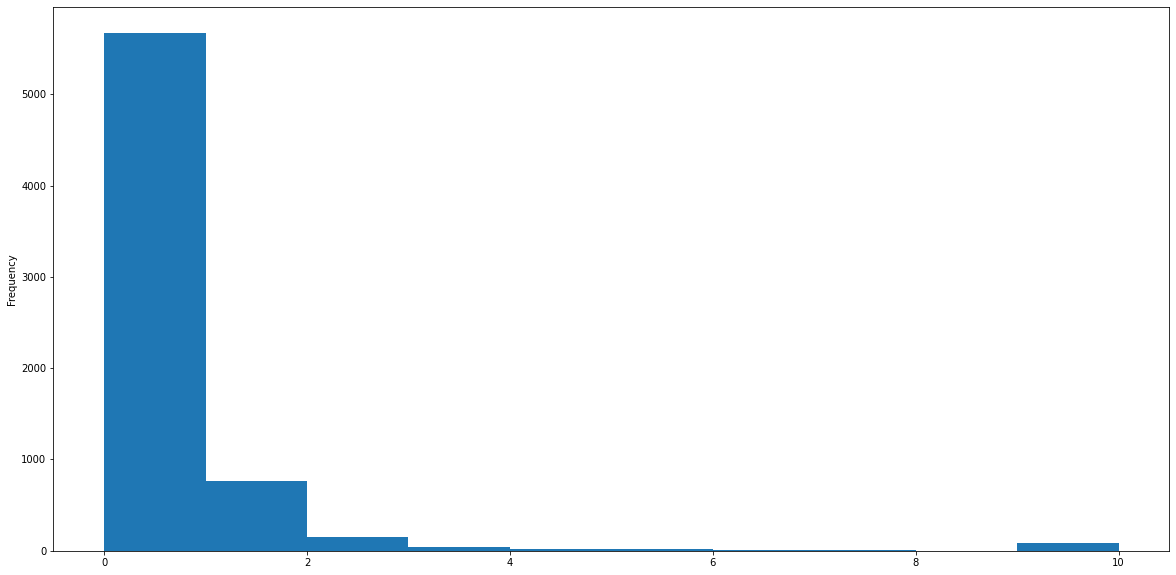

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 
w.plot.hist()


In [46]:
dfnew = pd.DataFrame(index = df_all_new.columns(), w)

SyntaxError: positional argument follows keyword argument (<ipython-input-46-cddc57c90b53>, line 1)

In [109]:
type(w)
w = w[w > 0]

In [112]:
w.to_frame()
w.to_csv(r'/Users/layalalzaydi/Desktop/Fillings/app/appData/14.csv')


## HERE 

In [125]:
import sqlite3

con = sqlite3.connect('Stocks.db')
con.execute("CREATE TABLE master(TKR PRIMARY KEY)")


In [152]:
def extractDigits(lst): 
    return list(map(lambda el:[el], lst)) 
      
              
# Driver code 
 
y = extractDigits(x)

y

con.executemany("INSERT  INTO master VALUES (?)", (y))
for row in con.execute("SELECT TKR FROM master"):
    print(row)

con.commit()
con.close()

ProgrammingError: Cannot operate on a closed database.

In [73]:
import pandas as pd 
import csv, sqlite3

#converte the list to df to csv 

df_stocks = pd.DataFrame({'TKR':x})
csv_data = df_stocks.to_csv(r'/Users/layalalzaydi/Desktop/Fillings/Stocks.csv')

connection = sqlite3.connect('Stocks.db')
cursor = connection.cursor()
connection.execute("CREATE TABLE a (TKR TEXT PRIMARY KEY, LINK TEXT);") 

In [64]:
import pandas as pd 
import csv, sqlite3

#converte the list to df to csv 

df_stocks = pd.DataFrame({'TKR':x})
csv_data = df_stocks.to_csv(r'/Users/layalalzaydi/Desktop/Fillings/Stocks.csv')

connection = sqlite3.connect('Stocks.db')
cursor = connection.cursor()
connection.execute("CREATE TABLE t (TKR);") 

with open('Stocks.csv',r'\Users\layalalzaydi\Desktop\Fillings\Stocks.csv') as fin: 
    dr = csv.DictReader(fin) 
    to_db = [(i['TKR']) for i in dr]

cursor.executemany("INSERT INTO t ('TKR') VALUES (?);", to_db)
connection.commit()
connection.close()

ValueError: invalid mode: '\Users\layalalzaydi\Desktop\Fillings\Stocks.csv'